![example](images/director_shot.jpeg)

# What factors make a film successful? 

**Authors:** Sam Rahwa

March 5, 2021
***

## Overview

Microsoft stakeholders have noticed their competitors creating original video content. In response, Microsoft has decided to create a new movie studio, but they are unfamiliar with the film sector. I have been charged with putting together a report that allows Microsoft Studios to make informed decisions about original video content. 

## Business Problem

Forrest Gump once said, “Life is like a box a chocolate, you never know what your going to get.” Films are just like this box of chocolates, you never what you might get. Just like one piece chocolate doesn’t make or break the whole box, no one factor can make or break a film. Factors like genres, critics reviews, audience ratings, directors and star power can aid in making a successful film. 

***
Business Questions:
* What types of genres gross the highest? Profit?
* What types of reviews matter by genre?
* Who should we acquire as our directors, actors and actresses? 
***

## Data Understanding

We will be using two datasets to begin our analysis:
* IMDB
* Rotten Tomatoes

In [7]:
# Importing standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
df_rotten_tomatoes = pd.read_csv('./data/rotten_tomatoes.csv')
df_imdb_mix_data = pd.read_csv('./data/imdb_mix_data.csv')

In [3]:
df_rotten_tomatoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129887 entries, 0 to 1129886
Data columns (total 29 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   rotten_tomatoes_link              1129887 non-null  object 
 1   movie_title                       1129887 non-null  object 
 2   movie_info                        1120202 non-null  object 
 3   critics_consensus                 991907 non-null   object 
 4   content_rating                    1129887 non-null  object 
 5   genres                            1129642 non-null  object 
 6   directors                         1115423 non-null  object 
 7   authors                           1075164 non-null  object 
 8   actors                            1119492 non-null  object 
 9   original_release_date             1106787 non-null  object 
 10  streaming_release_date            1119728 non-null  object 
 11  runtime                           112

In [4]:
df_imdb_mix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2097 non-null   object 
 1   tconst             2097 non-null   object 
 2   original_title_x   2097 non-null   object 
 3   start_year         2097 non-null   int64  
 4   runtime_minutes    1959 non-null   float64
 5   genres             2057 non-null   object 
 6   genre_ids          2097 non-null   object 
 7   id_x               2097 non-null   int64  
 8   original_language  2097 non-null   object 
 9   original_title_y   2097 non-null   object 
 10  popularity         2097 non-null   float64
 11  release_date_x     2097 non-null   object 
 12  vote_average       2097 non-null   float64
 13  vote_count         2097 non-null   int64  
 14  id_y               2097 non-null   int64  
 15  release_date_y     2097 non-null   object 
 16  production_budget  2097 

### Rotten Tomatoes

In [5]:
df_rotten_tomatoes.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Jeffrey Chen,False,Window to the Movies,Fresh,6/10,2010-08-04,Manages to pay its respects to the Greek myths...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Wesley Lovell,False,Cinema Sight,Fresh,3/4,2010-07-04,"Not a perfect film, but the movie does have a ..."
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Brett Michel,False,Boston Phoenix,Rotten,2.5/4,2010-07-06,Mildly diverting.
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Chris Bumbray,False,JoBlo's Movie Network,Rotten,5.5/10,2010-07-06,"Just another mediocre fantasy flick, but if yo..."
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Peter Canavese,False,Groucho Reviews,Fresh,2.5/4,2010-07-06,An enjoyable PG-rated family adventure in its ...


In [6]:
df_rotten_tomatoes.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,1.121623e+06,1.128421e+06,1.128421e+06,1.125598e+06,1.125230e+06,1.129887e+06,1.129887e+06,1.129887e+06
mean,1.082375e+02,6.373557e+01,1.393802e+02,6.421543e+01,4.354737e+05,3.142889e+01,9.394729e+01,4.538691e+01
std,1.898058e+01,2.657500e+01,1.004099e+02,1.916907e+01,3.218417e+06,1.698075e+01,8.869240e+01,4.384291e+01
min,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.500000e+01,4.300000e+01,5.700000e+01,5.000000e+01,5.283000e+03,1.700000e+01,2.700000e+01,1.100000e+01
50%,1.050000e+02,7.000000e+01,1.260000e+02,6.700000e+01,2.777400e+04,3.400000e+01,6.600000e+01,3.200000e+01
75%,1.190000e+02,8.700000e+01,1.950000e+02,8.000000e+01,1.197450e+05,4.500000e+01,1.350000e+02,6.800000e+01
max,2.660000e+02,1.000000e+02,5.740000e+02,1.000000e+02,3.579764e+07,6.900000e+01,4.970000e+02,3.030000e+02


In [7]:
df_rotten_tomatoes.nunique()

rotten_tomatoes_link                 17706
movie_title                          17100
movie_info                           17384
critics_consensus                     9130
content_rating                           6
genres                                1106
directors                             8930
authors                              12986
actors                               17326
original_release_date                 5804
streaming_release_date                2271
runtime                                190
production_company                    3045
tomatometer_status                       3
tomatometer_rating                     101
tomatometer_count                      407
audience_status                          2
audience_rating                         98
audience_count                       11067
tomatometer_top_critics_count           69
tomatometer_fresh_critics_count        359
tomatometer_rotten_critics_count       206
critic_name                          11108
top_critic 

In [8]:
df_rotten_tomatoes.duplicated().sum()

119471

In [9]:
round(df_rotten_tomatoes.isnull().mean()*100,2)

rotten_tomatoes_link                 0.00
movie_title                          0.00
movie_info                           0.86
critics_consensus                   12.21
content_rating                       0.00
genres                               0.02
directors                            1.28
authors                              4.84
actors                               0.92
original_release_date                2.04
streaming_release_date               0.90
runtime                              0.73
production_company                   1.05
tomatometer_status                   0.13
tomatometer_rating                   0.13
tomatometer_count                    0.13
audience_status                      3.25
audience_rating                      0.38
audience_count                       0.41
tomatometer_top_critics_count        0.00
tomatometer_fresh_critics_count      0.00
tomatometer_rotten_critics_count     0.00
critic_name                          1.64
top_critic                        

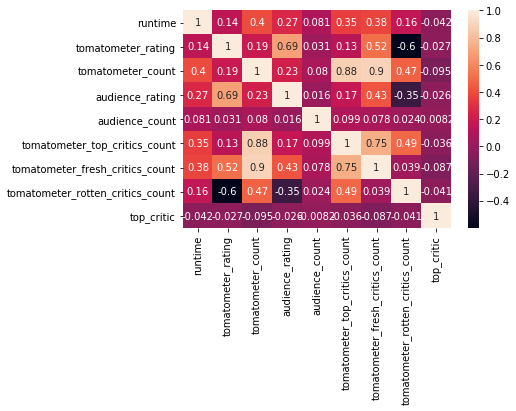

In [10]:
corr_matrix_rm = df_rotten_tomatoes.corr(method = 'pearson')
sns.heatmap(corr_matrix_rm, annot=True)
plt.show()

### IMDB

In [11]:
df_imdb_mix_data.head()

,title,tconst,original_title_x,start_year,runtime_minutes,genres,genre_ids,id_x,original_language,original_title_y,...,vote_count,id_y,release_date_y,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,10 Cloverfield Lane,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery","[53, 878, 18]",333371,en,10 Cloverfield Lane,...,4629,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422",Par.,72100000.0,38100000,2016
1,12 Strong,tt1413492,12 Strong,2018,130.0,"Action,Drama,History","[10752, 18, 36, 28]",429351,en,12 Strong,...,1312,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378",WB,45800000.0,21600000,2018
2,12 Years a Slave,tt2024544,12 Years a Slave,2013,134.0,"Biography,Drama,History","[18, 36]",76203,en,12 Years a Slave,...,6631,18,"Oct 18, 2013","$20,000,000","$56,671,993","$181,025,343",FoxS,56700000.0,131100000,2013
3,127 Hours,tt1542344,127 Hours,2010,94.0,"Adventure,Biography,Drama","[12, 18, 53]",44115,en,127 Hours,...,4469,6,"Nov 5, 2010","$18,000,000","$18,335,230","$60,217,171",FoxS,18300000.0,42400000,2010
4,13 Sins,tt2059171,13 Sins,2014,93.0,"Horror,Thriller","[27, 53]",155084,en,13 Sins,...,576,51,"Apr 18, 2014","$4,000,000","$9,134","$47,552",RTWC,13800.0,NaN,2014


In [12]:
df_imdb_mix_data.describe()

,start_year,runtime_minutes,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,year
count,2097.000000,1959.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2.096000e+03,2097.000000
mean,2014.069623,103.423686,211356.833095,11.694282,6.299189,1956.481164,52.231283,5.723426e+07,2013.988078
std,2.556969,24.605305,143054.135971,8.011533,1.098483,2768.644992,28.747078,8.420453e+07,2.513770
min,2010.000000,3.000000,1771.000000,0.600000,0.000000,1.000000,1.000000,8.000000e+02,2010.000000
25%,2012.000000,91.000000,70877.000000,7.518000,5.800000,230.000000,28.000000,4.000000e+06,2012.000000
50%,2014.000000,103.000000,207932.000000,10.388000,6.300000,941.000000,52.000000,3.000000e+07,2014.000000
75%,2016.000000,117.000000,333465.000000,14.797000,6.900000,2389.000000,77.000000,7.107500e+07,2016.000000
max,2020.000000,192.000000,561861.000000,80.773000,10.000000,22186.000000,100.000000,7.001000e+08,2018.000000


In [13]:
df_imdb_mix_data.nunique()

title                1143
tconst               1555
original_title_x     1208
start_year             11
runtime_minutes       135
genres                234
genre_ids             459
id_x                 1230
original_language      23
original_title_y     1163
popularity           1156
release_date_x        672
vote_average           54
vote_count           1022
id_y                  100
release_date_y        530
production_budget     216
domestic_gross_x     1144
worldwide_gross      1149
studio                 87
domestic_gross_y      800
foreign_gross         757
year                    9
dtype: int64

In [14]:
df_imdb_mix_data.duplicated().sum()

196

In [15]:
round(df_imdb_mix_data.isnull().mean()*100,2)

title                 0.00
tconst                0.00
original_title_x      0.00
start_year            0.00
runtime_minutes       6.58
genres                1.91
genre_ids             0.00
id_x                  0.00
original_language     0.00
original_title_y      0.00
popularity            0.00
release_date_x        0.00
vote_average          0.00
vote_count            0.00
id_y                  0.00
release_date_y        0.00
production_budget     0.00
domestic_gross_x      0.00
worldwide_gross       0.00
studio                0.00
domestic_gross_y      0.05
foreign_gross        16.50
year                  0.00
dtype: float64

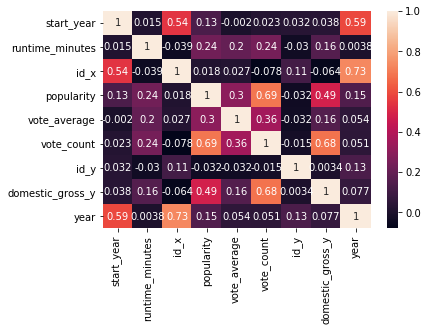

In [16]:
corr_matrix_imdb = df_imdb_mix_data.corr(method = 'pearson')
sns.heatmap(corr_matrix_imdb, annot = True)
plt.show()

# Data Preparation


### IMDB

In [17]:
# Dropping Duplicates

df_imdb_mix_data = df_imdb_mix_data.drop_duplicates()

# Creating a smaller dataframe with genre and gross data to create value

df_genres_gross = df_imdb_mix_data[['genres', 'domestic_gross_x', 'foreign_gross', 'production_budget']]

In [18]:
# Breaking the genres into three separate groups
df_genres_gross['primary_genre'] = df_genres_gross['genres'].str.split(',', expand = True)[0]
df_genres_gross['secondary_genre'] = df_genres_gross['genres'].str.split(',', expand = True)[1]
df_genres_gross['tertiary_genre'] = df_genres_gross['genres'].str.split(',', expand = True)[2]

# Checking the number of primary genres
df_genres_gross['primary_genre'].nunique()

17

In [19]:
# Cleaning up the gross, foreign and production budget
df_genres_gross['domestic_gross_x'] = df_genres_gross['domestic_gross_x'].str.replace(',', '').str.replace('$', '').astype(int)
df_genres_gross['production_budget'] = df_genres_gross['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
df_genres_gross['foreign_gross'] = pd.to_numeric(df_genres_gross['foreign_gross'], errors = 'coerce').astype(pd.Int64Dtype())

# Dtypes and NaN Issues Clean up
df_genres_gross['foreign_gross'] = df_genres_gross['foreign_gross'].fillna(0).astype(np.int64, errors = 'ignore')
df_genres_gross['domestic_gross_x'] = df_genres_gross['domestic_gross_x'].fillna(0).astype(np.int64, errors = 'ignore')
df_genres_gross['production_budget'] = df_genres_gross['production_budget'].fillna(0).astype(np.int64, errors = 'ignore')

# Renaming Column
df_genres_gross = df_genres_gross.rename(columns = {'domestic_gross_x': 'domestic_gross'})

In [20]:
# Creating Profit Columns 
df_genres_gross['domestic_profit'] = df_genres_gross['domestic_gross'] - df_genres_gross['production_budget']
df_genres_gross['foreign_profit'] = df_genres_gross['foreign_gross'] - df_genres_gross['production_budget'] 

In [21]:
df_genres_gross.head(3)

,genres,domestic_gross,foreign_gross,production_budget,primary_genre,secondary_genre,tertiary_genre,domestic_profit,foreign_profit
0,"Drama,Horror,Mystery",72082999,38100000,5000000,Drama,Horror,Mystery,67082999,33100000
1,"Action,Drama,History",45819713,21600000,35000000,Action,Drama,History,10819713,-13400000
2,"Biography,Drama,History",56671993,131100000,20000000,Biography,Drama,History,36671993,111100000


### Rotten Tomatoes

In [22]:
# Dropping Duplicates

df_rotten_tomatoes = df_rotten_tomatoes.drop_duplicates()

# Creating a smaller dataframe with genre and gross data to create value

df_genres_ppl_critics = df_rotten_tomatoes[['actors', 'directors', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'audience_rating', 'runtime', 'genres']]

In [23]:
df_genres_ppl_critics.duplicated().sum()

992710

In [24]:
df_genres_ppl_critics = df_genres_ppl_critics.drop_duplicates()

In [25]:
# Breaking the genres, directors and actors into three separate primary groups
df_genres_ppl_critics['primary_actor'] = df_genres_ppl_critics['actors'].str.split(',', expand = True)[0]
df_genres_ppl_critics['primary_director'] = df_genres_ppl_critics['directors'].str.split(',', expand = True)[0]
df_genres_ppl_critics['primary_genre'] = df_genres_ppl_critics['genres'].str.split(',', expand = True)[0]

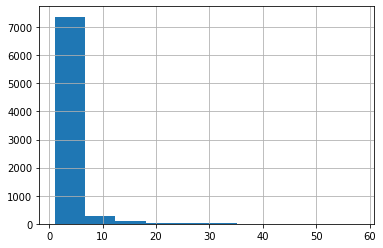

In [26]:
# Most Actors/Actresses make 1 film
df_genres_ppl_critics.primary_actor.value_counts().hist();

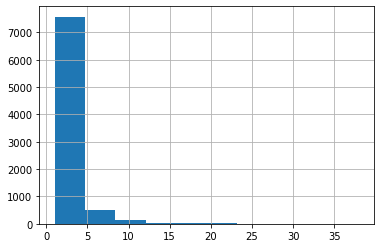

In [27]:
# Most Directors make 1 film
df_genres_ppl_critics.primary_director.value_counts().hist();

In [28]:
# Creating a Primary Genres and Review Types DataFrame Subset
genres = pd.get_dummies(df_genres_ppl_critics['primary_genre'])
critics_columns = ['tomatometer_top_critics_count','tomatometer_fresh_critics_count', 'audience_rating']
critics = df_genres_ppl_critics[critics_columns]
df_genres_and_critics = pd.concat([genres, critics], axis =1)

In [29]:
# Primary Directors and Primary Actors
directors_counts = df_genres_ppl_critics.primary_director.value_counts()
directors = directors_counts[directors_counts >= 20].index
filtered_directors_frame = df_genres_ppl_critics[df_genres_ppl_critics.primary_director.isin(directors)]

actors_counts = df_genres_ppl_critics.primary_actor.value_counts()
actors = actors_counts[actors_counts >= 25].index
filtered_actors_frame = df_genres_ppl_critics[df_genres_ppl_critics.primary_actor.isin(actors)]

# Data Modeling


### IMDB

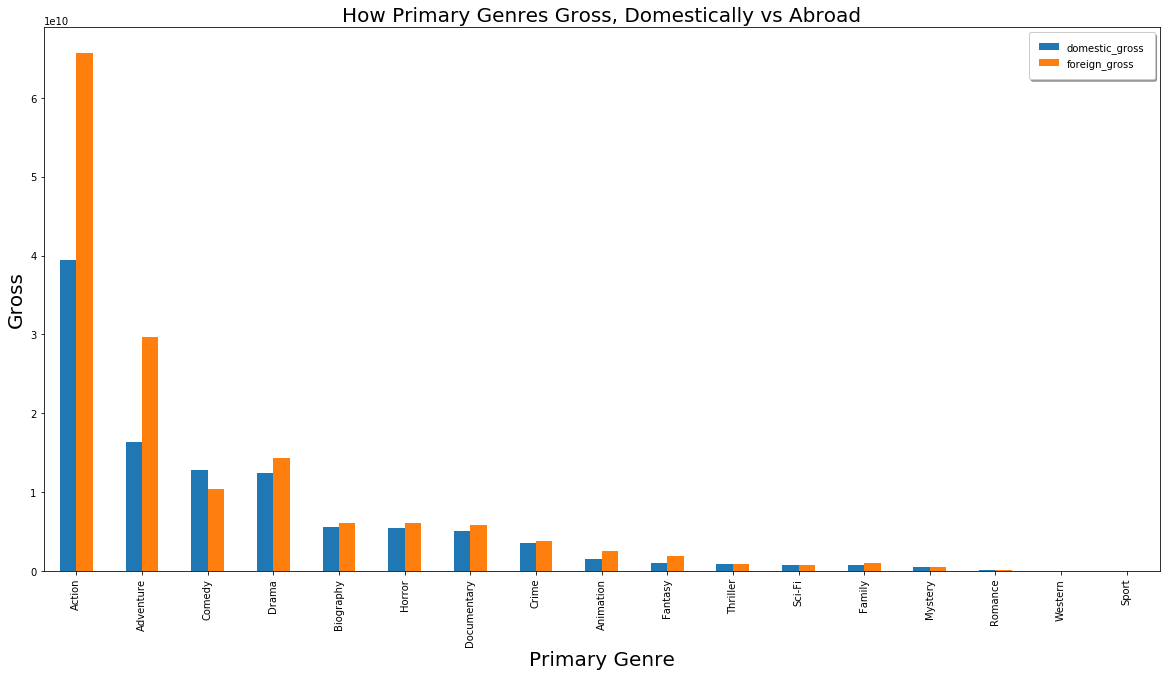

In [30]:
# What types of genres gross the most?

fig, ax = plt.subplots(figsize=(20,10))
display(df_genres_gross[['domestic_gross', 'foreign_gross']].groupby(df_genres_gross["primary_genre"]).sum()\
        .sort_values("domestic_gross", ascending = False).plot(kind = 'bar', ax = ax));

plt.ylabel('Gross', size = 20)
plt.xlabel('Primary Genre', size = 20)
plt.title('How Primary Genres Gross, Domestically vs Abroad', size = 20)

ax.legend(loc = 'upper left', frameon = False)
ax.legend(fancybox = True, framealpha = 1, shadow = True, borderpad = 1);

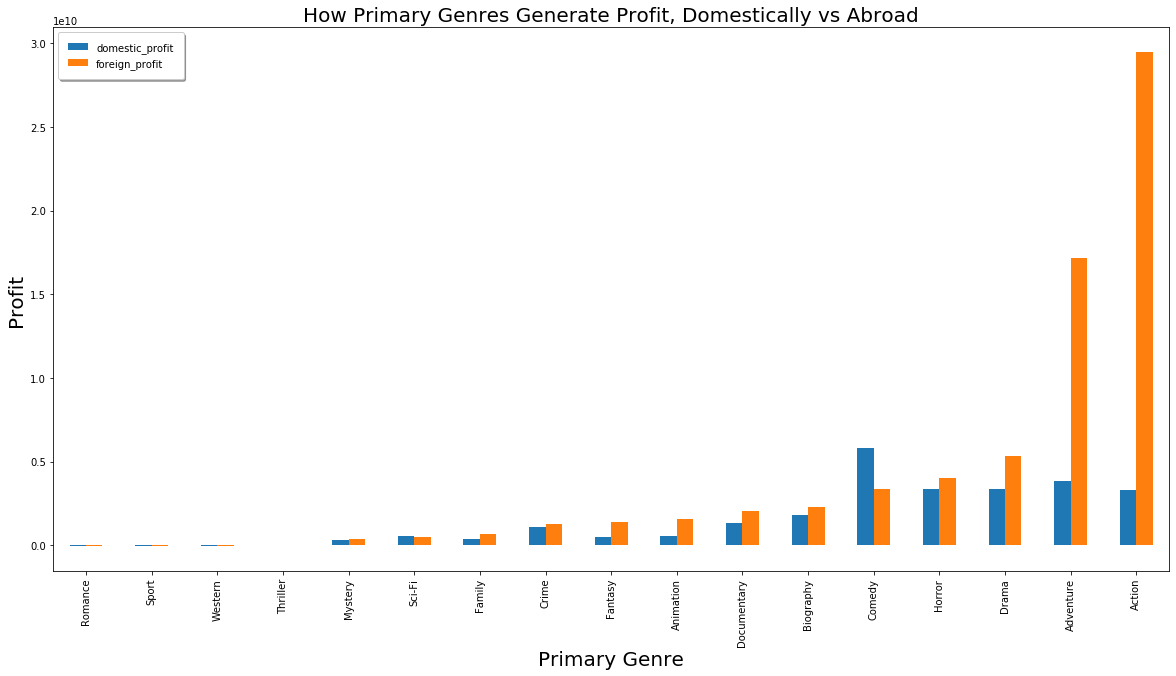

In [31]:
# What types of genres profit the most?

fig, ax = plt.subplots(figsize=(20,10))
display(df_genres_gross[['domestic_profit', 'foreign_profit']].groupby(df_genres_gross["primary_genre"]).sum()\
        .sort_values("foreign_profit", ascending = True).plot(kind = 'bar', ax = ax));

plt.ylabel('Profit', size = 20)
plt.xlabel('Primary Genre', size = 20)
plt.title('How Primary Genres Generate Profit, Domestically vs Abroad', size = 20)

ax.legend(loc = 'upper left', frameon = False)
ax.legend(fancybox = True, framealpha = 1, shadow = True, borderpad = 1);

### Rotten Tomatoes

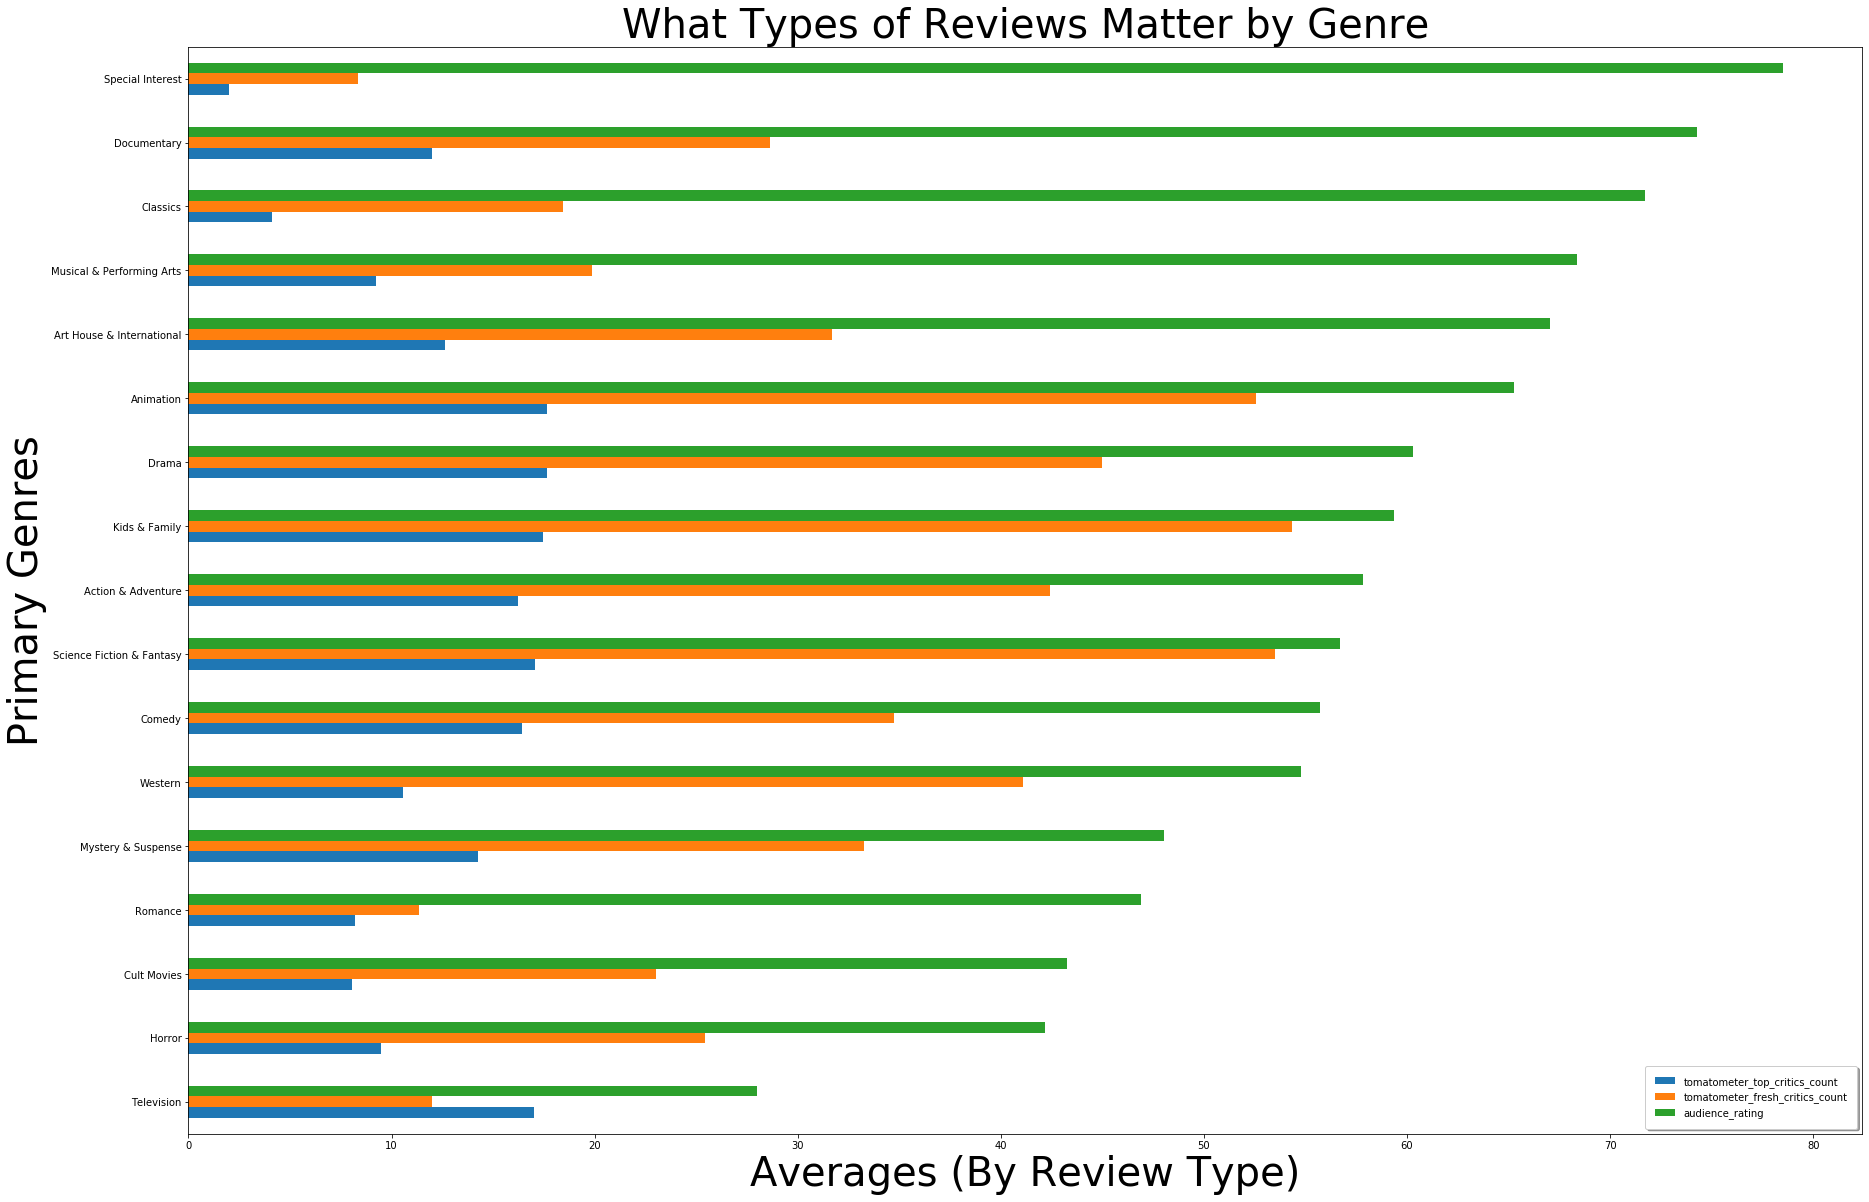

In [32]:
# What types of reviews matter by genre?

fig, ax = plt.subplots(figsize=(30,20))
df_genres_ppl_critics[["primary_genre",'tomatometer_top_critics_count','tomatometer_fresh_critics_count',\
                       'audience_rating']].groupby("primary_genre").mean().\
                        sort_values('audience_rating', ascending = True)\
                        .plot(kind = 'barh', ax = ax)

plt.ylabel("Primary Genres", size = 40)
plt.xlabel("Averages (By Review Type)", size = 40)
plt.title("What Types of Reviews Matter by Genre", size = 40)

ax.legend(loc = 'upper right', frameon = False)
ax.legend(fancybox = True, framealpha = 1, shadow = True, borderpad = 1);

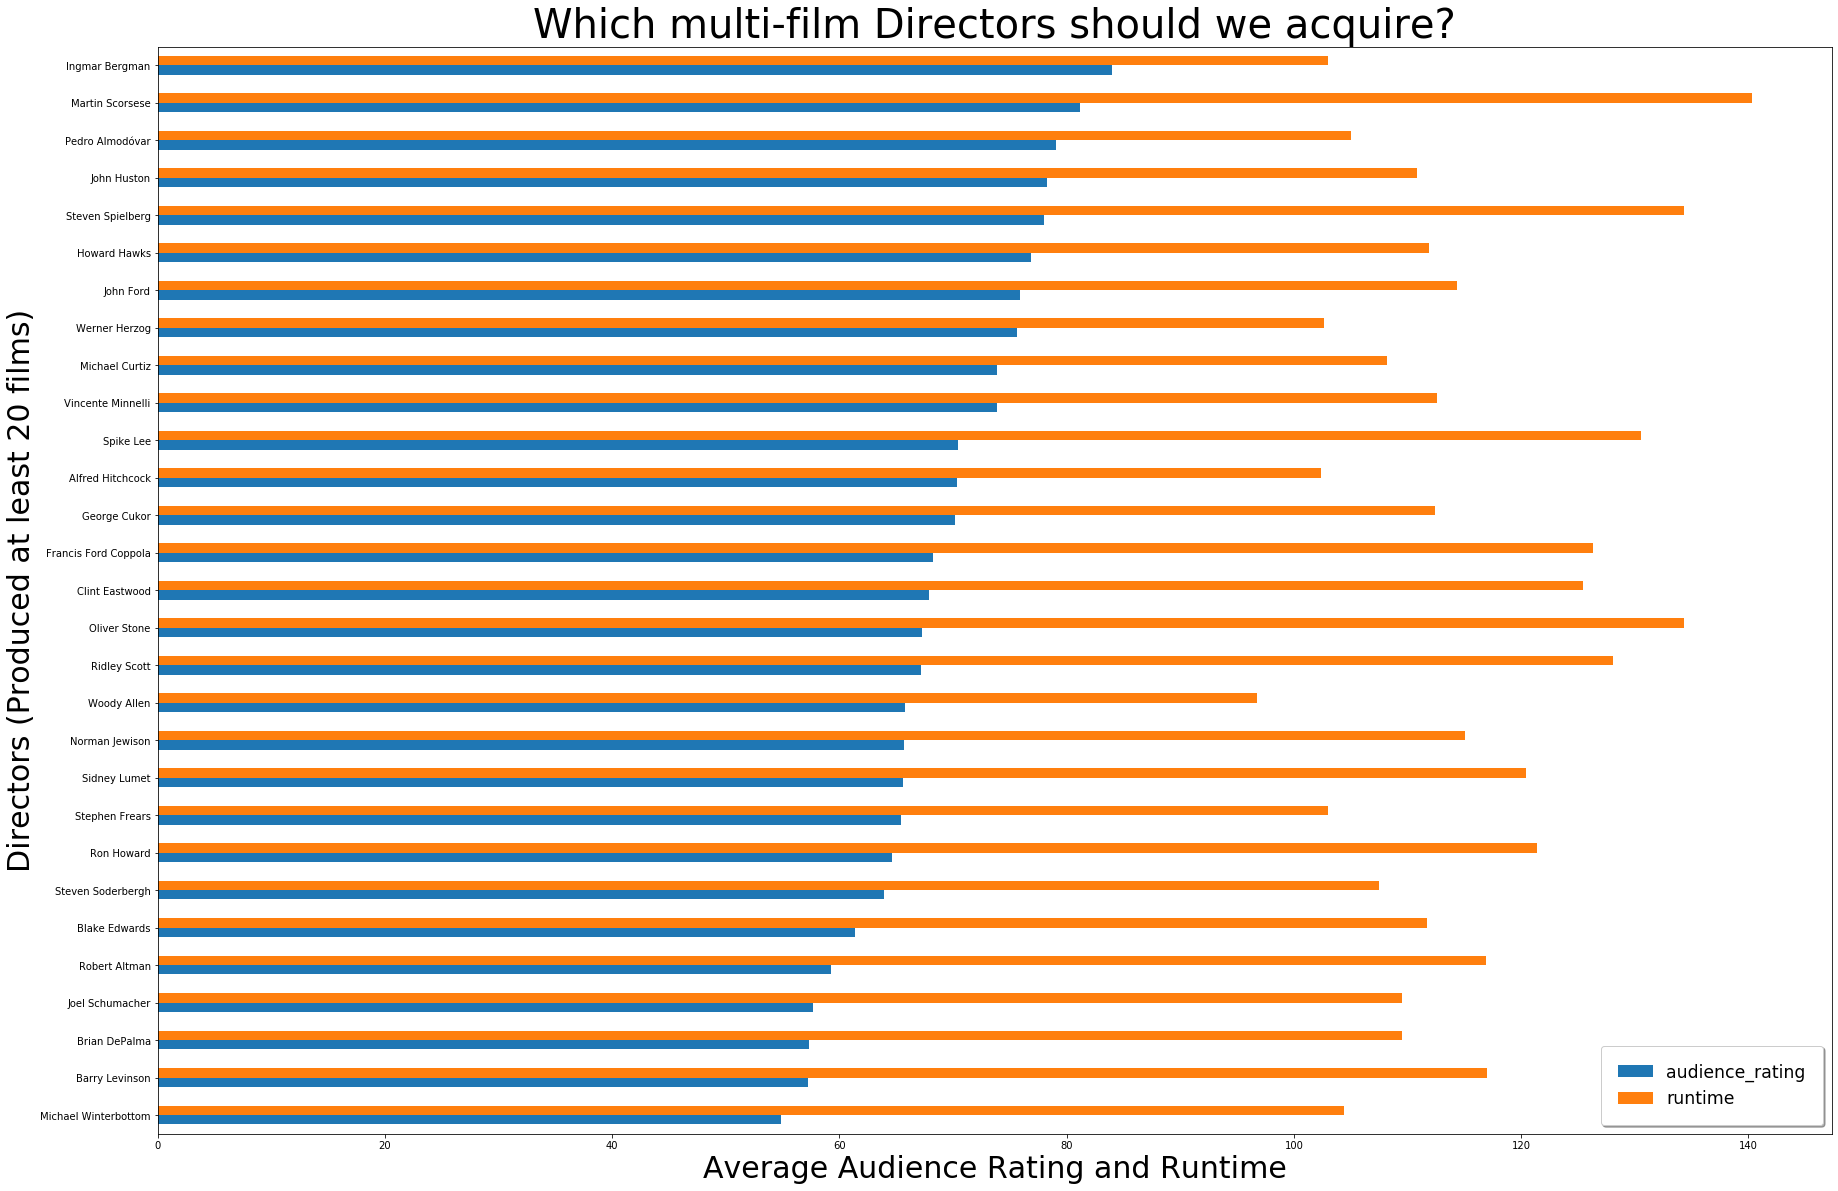

In [33]:
# Which multi-film Directors should we recruit?

fig, ax = plt.subplots(figsize=(30,20))
filtered_directors_frame[['audience_rating', 'runtime']].\
                        groupby(filtered_directors_frame['primary_director']).mean()\
                        .sort_values(by = 'audience_rating', ascending = True).plot(kind = 'barh', ax = ax)

plt.ylabel("Directors (Produced at least 20 films)", size = 30)
plt.xlabel("Average Audience Rating and Runtime", size = 30)
plt.title("Which multi-film Directors should we acquire?", size = 40)

ax.legend(loc = 'upper right', frameon = False)
ax.legend(fancybox = True, framealpha = 1, shadow = True, borderpad = 1, fontsize = 'xx-large');

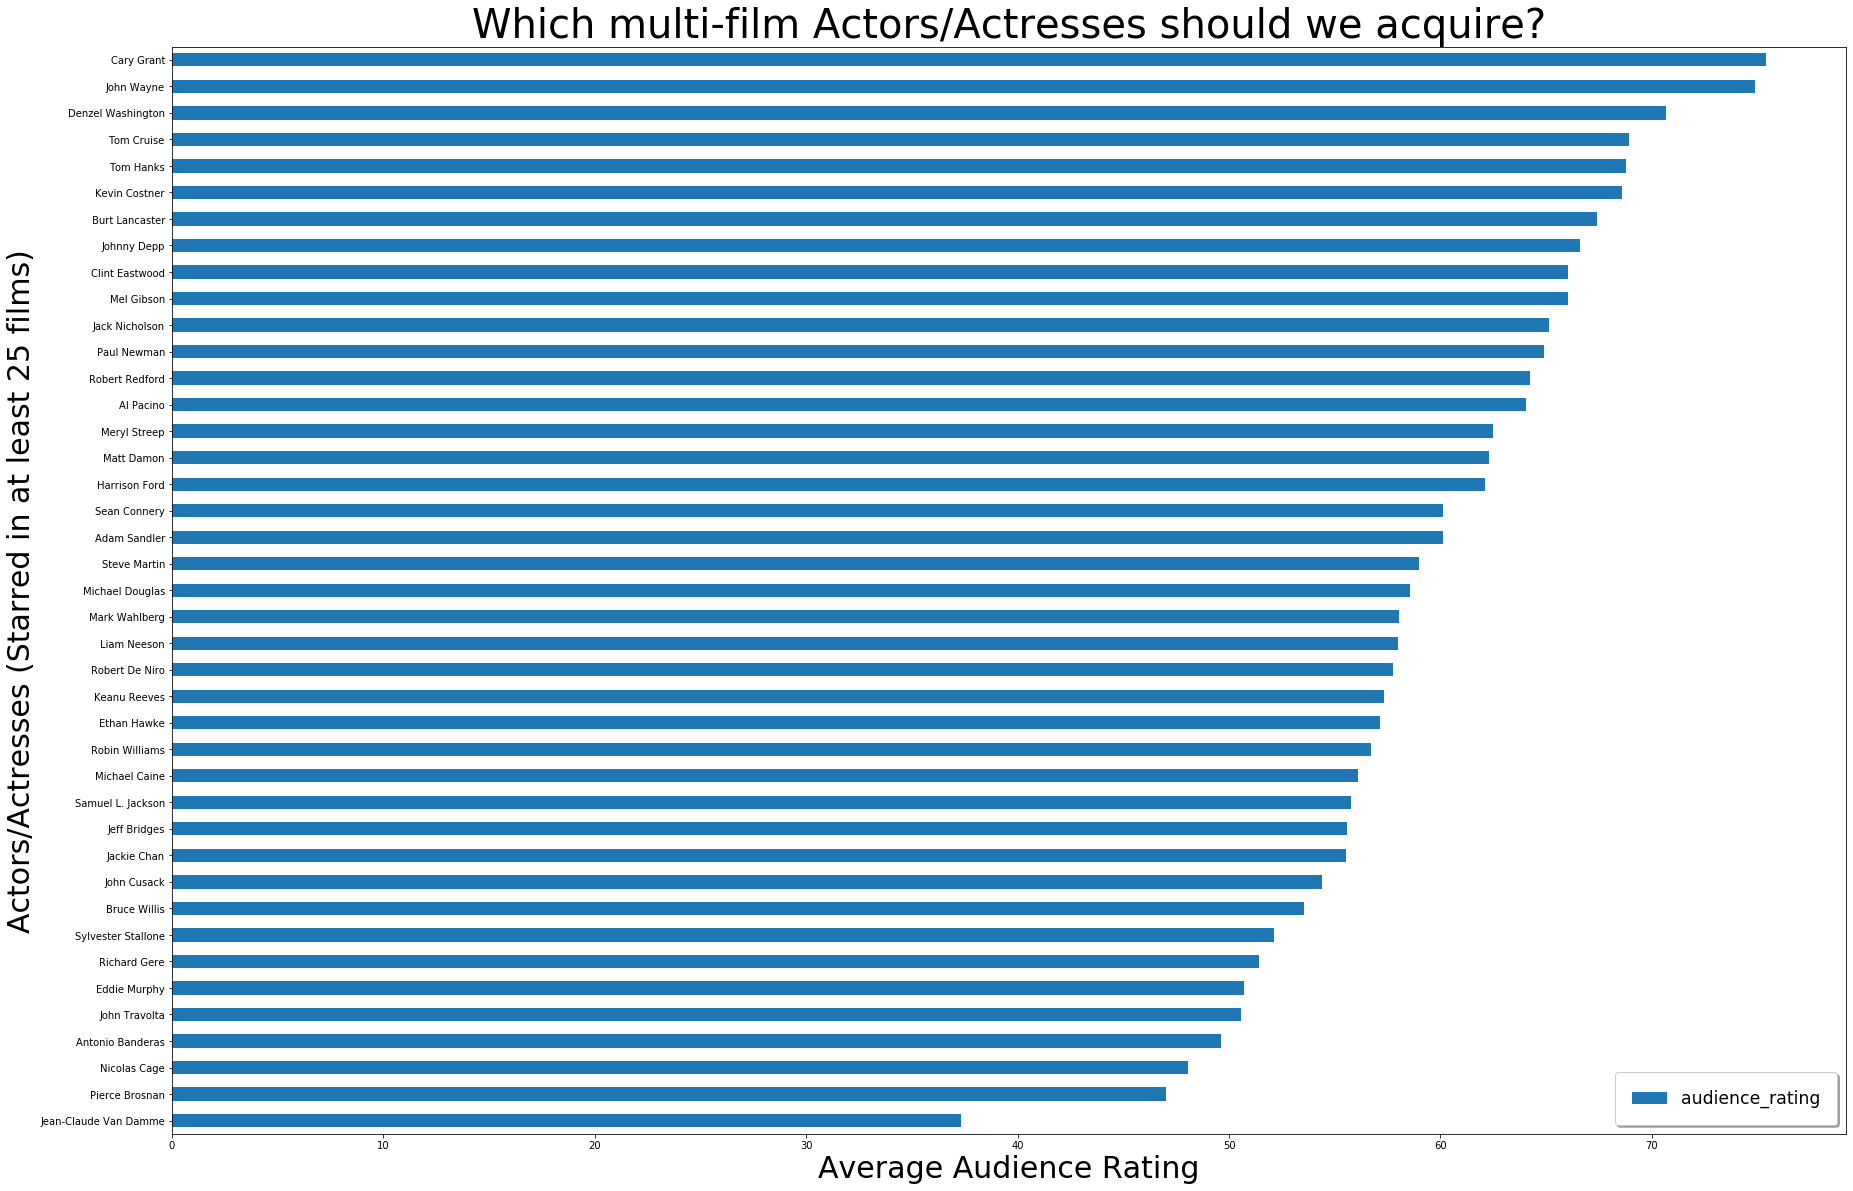

In [34]:
# Who should star in our productions? 

fig, ax = plt.subplots(figsize=(30,20))
filtered_actors_frame[['audience_rating']].groupby(filtered_actors_frame['primary_actor']).mean()\
                     .sort_values(by = 'audience_rating', ascending = True).plot(kind = 'barh', ax = ax)

plt.ylabel("Actors/Actresses (Starred in at least 25 films)", size = 30)
plt.xlabel("Average Audience Rating", size = 30)
plt.title("Which multi-film Actors/Actresses should we acquire?", size = 40)

ax.legend(loc = 'upper right', frameon = False)
ax.legend(fancybox = True, framealpha = 1, shadow = True, borderpad = 1, fontsize = 'xx-large');

## Results

#### Top Grossing Genres:

Domestic: 
* (1) Action 
* (2) Adventure  
* (3) Comedy

Abroad: 
* (1) Action
* (2) Adventure
* (3) Drama

#### Top Profits By Genre:

Domestic: 
* (1) Comedy
* (2) Adventure
* (3) Action

Abroad:
* (1) Action
* (2) Adventure
* (3) Drama 

#### Audience Ratings are the most dominate type of review, for almost every genre. 

#### Multi-Film Directors have issues with runtime and what the audience loves to watch.
(The criteria was a minimum  production of at least 18 films)

#### Audience ratings pointed to multi-film Actors/Actresses were dominated by men, who mainly starred in Action, Adventure and Drama genres.
(The criteria was a minimum of being in at least 25 films)

# Conclusions

### A film is multifaceted. One factor is not the sole determinant for why a film will be successful or fail. We can this the correlation matrices. By using the following common factors: genres that gross/profit the most, audience reviews, highest audience approvals for directors, the average directors runtimes and the top actors/actresses to target for our films, we can build a successful launch point for our production studio's success strategy.



### Top Grossing and Profits by Genre:

We need more research on the film industry to see how film budgets with advertising included compare to film budgets without advertising. We would also need a larger dataset, so we could encompass more film data into smaller categories for accuracy.

### Audience Ratings are the most dominate types of reviews for almost every Genre:

We need to see more data on how review types influence the story of a film. Critics often release reviews before a film is released and the audience often makes it's judgment once they have seen the film post release.

### Multi-Film Directors and Actors/Actresses have no correlation between average Audience Rating and Runtime

People like what is familiar. For example, you probably buy the exact same detergent every time. You get the same meals when you eat out. You buy books by your favorite authors. The same thing goes for movies - people are going to go to the movies with actors/actresses that they've seen in the past, because they're familiar. The same goes for directors. Directors use their preferred actors/actresses whenever they can. So how do we effective evaluate the success of a newcomers?